In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "C:/Users/User/Matplotlib/MouseData.csv"
study_results = "C:/Users/User/Matplotlib/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_study_data=pd.merge(study_results,mouse_metadata,how='outer', on="Mouse ID")

combined_study_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Create inital summary table with Drug Regimes and counts
tumor_data = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())
tumor_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [5]:
tumor_data = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())

tumor_data["Mean"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
tumor_data["Median"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
tumor_data["Standard Deviation"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
tumor_data["Variance"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
tumor_data["SEM"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


tumor_data = tumor_data[[ "Mouse ID","Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
tumor_dataa= tumor_data[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

tumor_data.head()

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [15]:
tumor_dataa= tumor_data[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

tumor_dataa.head()

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466


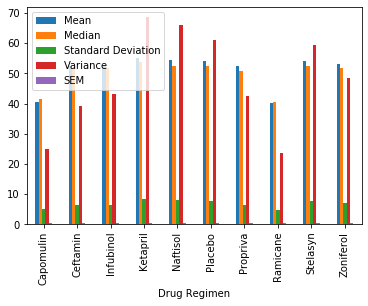

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Mouse ID variable unnecesary. 
tumor_dataa.plot(kind='bar')

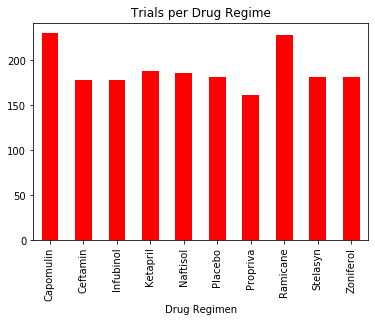

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing number of data points[mouse ID] for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
#tumor_data = combined_study_data.groupby['Drug Regimen']

tumor_data2 = tumor_data[["Mouse ID"]]

# Use DataFrame.plot() in order to create a bar chart of the data
tumor_data2.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

(0, 240)

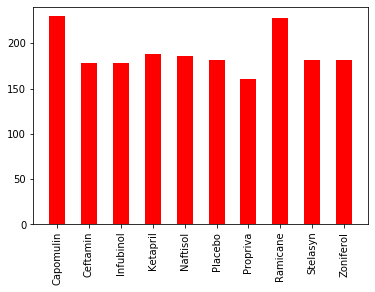

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(tumor_data))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, tumor_data["Mouse ID"], color = "r", width = .5)
plt.xticks(tick_locations, tumor_data.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(tumor_data["Mouse ID"])+10)

In [19]:
combined_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [20]:
combined_study_data.groupby("Sex")["Sex"].count()

Sex
Female    935
Male      958
Name: Sex, dtype: int64

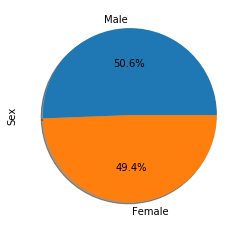

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode=(0,0)

sexPie=combined_study_data.groupby("Sex")['Sex'].count().sort_index(ascending=False)
sexPie.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True)
plt.savefig("Pandas Pie.png")

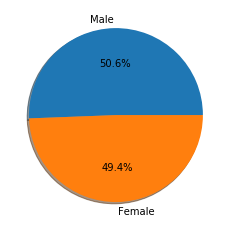

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexPie, explode=explode, autopct="%1.1f%%", shadow=True, labels=sexPie.index)
plt.savefig("Pyplot Pie.png")

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
combined_study_data.groupby("Mouse ID")["Tumor Volume (mm3)"].max()

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
          ...    
z435    48.710661
z578    45.000000
z581    62.754451
z795    65.741070
z969    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [29]:
tumor_number = combined_study_data.loc[(combined_study_data["Drug Regimen"]=="Capomulin") | (combined_study_data["Drug Regimen"] == "Ramicane") | (combined_study_data["Drug Regimen"] == "Infubinol") | (combined_study_data["Drug Regimen"] == "Ceftamin"), :]
tumor_number = tumor_number.sort_values("Timepoint", ascending= False)
tumor_number = tumor_number.drop_duplicates(subset="Mouse ID", keep='first')
tumor_number.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,m601,45,28.430964,1,Capomulin,Male,22,17
1700,s185,45,23.343598,1,Capomulin,Female,3,17
1364,y865,45,64.729837,3,Ceftamin,Male,23,26
1497,x581,45,64.634949,3,Ceftamin,Female,19,28
1844,l897,45,38.846876,1,Capomulin,Male,17,19


In [30]:
quartiles = tumor_number['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64

In [31]:
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [32]:
lower_bound = lowerq - (1.5*iqr)
lower_bound

3.0739668737499812

In [33]:
upper_bound = upperq + (1.5*iqr)
upper_bound

94.04403868375002

In [34]:
tumor_data3 = tumor_number.loc[(tumor_number['Tumor Volume (mm3)'] > upper_bound) | (tumor_number['Tumor Volume (mm3)'] < lower_bound), :]
tumor_data3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [35]:
#Apparently the are not outliers. 

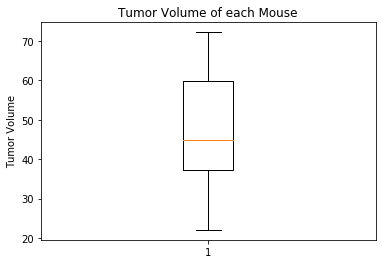

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume= tumor_number['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of each Mouse')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)
plt.show()

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = combined_study_data.loc[(combined_study_data["Drug Regimen"]== "Capomulin") | (combined_study_data["Mouse ID"]== "b128"), :]
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


Text(0, 0.5, 'Tumor Volume')

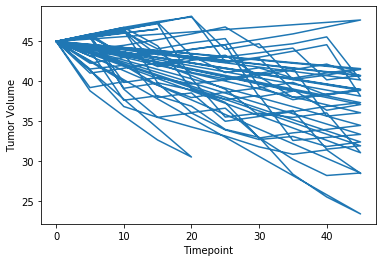

In [45]:
timepoint = capomulin_data["Timepoint"]
tumor_volume = capomulin_data["Tumor Volume (mm3)"]
tumor_value_data= plt.plot(timepoint, tumor_volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

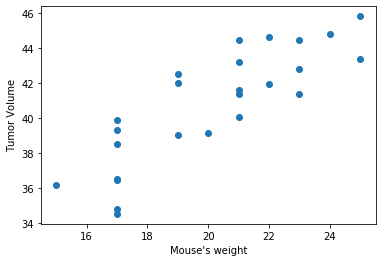

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data.groupby(capomulin_data["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_data.groupby(capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse's weight")
plt.ylabel("Tumor Volume")
plt.show()

In [50]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data.groupby(capomulin_data["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_data.groupby(capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, tumor_volume)

line = slope * mouse_weight + int

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse's weight")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,line,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

TypeError: <class 'type'>